# Set up

In [2]:
# Packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import cm
from ISLP import confusion_table
from sklearn.svm import SVC
import sklearn.model_selection as skm
from ISLP.svm import plot as plot_svm
from matplotlib.pyplot import subplots
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Setting up WD
os.chdir(r"C:\Users\sanne\OneDrive\Documenten\Lund Uni\Advanced machine learning\ProjectDivorce")

# Loading data
data = pd.read_csv("divorce.csv")
X = data.drop(columns= ['Divorce_Y_N'])
y = data['Divorce_Y_N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46, stratify=y)

# Abstract

Predicting divorce is crucial due to its profound personal, social, and psychological consequences. This study applies Support Vector Machines (SVM) combined with Principal Component Analysis (PCA) to the Divorce Predictor Scale (DPS) in order to improve predictive accuracy and interpretability. Unlike prior approaches that relied on nonlinear kernels or tree-based methods, the PCA-transformed dataset in this research revealed near-perfect linear separability, enabling a linear SVM to achieve a mean test accuracy of approximately 98.2% under bootstrap evaluation. This performance surpasses the 97.15% accuracy reported in comparable studies and closely approaches leading benchmarks exceeding 98%.

These results suggest that the strong correlations within the DPS variables reflect an underlying linear structure, making a linear kernel more suitable than more complex alternatives. Furthermore, while previous research often emphasized the importance of positive relational attributes, this analysis identifies conflict-driven behaviors—such as insults and humiliation—as key factors that decisively separate stable from unstable marriages in a linearized feature space. By leveraging PCA for dimensionality reduction, the model not only maintains exceptional accuracy but also enhances the clarity with which critical predictors are understood.

Overall, this study demonstrates that aligning modeling techniques with the intrinsic properties of the data can uncover pivotal indicators of marital stability. The PCA-informed linear SVM approach provides a more interpretable and robust framework for divorce prediction, highlighting the role of specific behavioral dimensions in shaping marital outcomes.

# Introduction 

Divorce is one of the most impactful events that can affect an individual’s personal, social, and psychological well-being. Not only does it negatively affect the couple, it's also proven to be detrimental to those around them. Research indicates that parental divorce significantly impacts children's long-term mental health, with 40% of children experiencing long-term psychological consequences from childhood divorce (Sun, 2008). In addition, divorces also are known to increase stress, lead to financial ruin, and shrink social circles (Amato, 2000). 

While the negative effects of divorce are significant, the positive effects of a successful marriage are equally significant. Empirical studies have proven successful marriages increase happiness, health, and overall life outcomes (Be et al, 2013; Vanassche et al, 2013; Whisman et al, 2018). Though the detriments of divorce are well understood, this begs the question of why divorces have been increasing in recent decades. 

The proliferation of divorce worldwide transcending national borders, cultures, and religious contexts has garnered attention from the media, academia, and community leaders seeking to understand the reasons for this trend. This can be seen clearly by peering into the marriage and divorce data of 33 member states of the OECD. Notably, Turkey which has seen its divorces per 1000 increase to its highest in 2022 at 2.1 (Eurostat, 2023). Contextualizing this statistic, Turkey had a marriage rate of 6.8 per 1000 people which reveals a divorce-to-marriage ratio of 30.9%, indicating one new divorce for approximately every 3.23 new marriages. In comparison in the US half of all marriages end in divorce with 41% of all in the first marriage, 60% in the second, and 73% in the third. Moreover, it has the sixth-highest divorce rate in the world. (Wilkinson & Finkbeiner, 2024). 

The last few decades have seen a decline in the belief in marriages culminating in marriages collapsing in the US by 50% and over 20% in the OECD  states (Ortiz-Ospina et al, 2020). This trend has sparked a debate on the reasons behind this phenomenon and led to a surge in studies investigating the underlying factors that determine a successful marriage and counter-intuitive factors that predict divorce. Divorce and its effects on both couples and their children have been well-documented and researched, however, only a few studies have focused on predicting divorce using specific indicators.

This study utilizes advanced machine learning algorithms to explore the predictive capabilities of the Divorce Predictor Scale (DPS) in understanding marital stability. By applying computational techniques such as Support Vector Machines, Principal Component Analyses and Bootstrapping the research aims to identify key features and dimensions within the scale that significantly influence divorce prediction. The primary objective is to enhance predictive accuracy through sophisticated analysis, examining relationships between DPS items and potential marriage dissolution outcomes. 



# Literature review
Several related studies on this topic have been conducted, as well as studies that have utilized this dataset to predict divorce rates. These studies employed various machine learning algorithms to identify and analyze factors that influence and predict divorce rates. The Divorce Predictor Scale, developed by Gottman Couples Therapy is an assessment tool that identifies key indicators of marital stability and divorce risk. Through its scales, the Gottman couples therapy model identifies the factors that contribute to divorce. This scale has demonstrated its effectiveness as a robust psychological and psychometric tool to evaluate compatibility, conflict resolution strategies, and communication patterns of marital relationships (Gottman 2000). 

Many of the subsequent studies build on Gottman's couples therapy model, which highlights critical communication styles - Criticism, Contempt, Stonewalling, and Defensiveness- as key predictors of divorce (Gottman, 2014). Notable among these is Yöntem et al.'s (2019) research, which developed a Divorce Predictor Scale (DPS) based on Gottman's therapy principles. Their study surveyed participants and classified them into two categories: divorced and married. Using correlation-based feature selection and artificial neural networks (ANN), they achieved a 98.23% accuracy rate in predicting divorce. Furthermore, they used Radial Basis Function neural networks (RBF) and Random Forests which achieved 98.82% and 97.64% accuracy respectively. The ANN accuracy improved when a relationship-based feature selection was applied which highlights the importance of feature engineering when utilizing machine learning models. 

Kong and Chai's (2020) study closely parallels our research in both scope and methodology. They investigated the issue using three methods – SVM, Random Forests, and Natural Gradient Boosting – with a sample size of 170 participants responding to 54 survey questions. Their findings identified NGBoost as the superior predictive model with an accuracy of 98.83% accuracy. In contrast, Irfan's (2018) study, which opted against feature selection and instead utilized Naïve Bayes and K-Nearest Neighbour methods, produced notably lower accuracy rates of 72.5% and 57.5% respectively. This emphasizes how crucial feature selection is when implementing these predictive models in finding optimal models.

In a recent study, Alshawarbeh et al. (2023) applied machine learning methods to predict divorce rates using the Divorce predictor dataset. Their research implemented six distinct algorithms: Logistic Regression, LDA, KNN, Classification and Regression Trees (CART), Gaussian Naives Bayes, and Support Vector Machines (SVM). Their findings revealed that SVMs demonstrated superior performance with an accuracy rate of 98.57%, while Classification and Regression Trees (CART) showed the lowest accuracy among the methods tested. Their study’s use of multiple Machine learning methods in predicting divorce rates informs our analysis of a valuable baseline for understanding SVM's performance with the original feature set. Our research builds upon these findings by investigating whether the integration of Principal Component Analysis can further enhance SVM's already high predictive capabilities. Rather than comparing multiple algorithms, we take a more focused approach by examining how feature engineering through PCA might optimize SVM's performance in divorce prediction, potentially improving both computational efficiency and predictive accuracy.

This report aims to investigate whether dimension reduction techniques, specifically Principal Component Analysis (PCA), can enhance the predictive capabilities of Support Vector Machines in divorce prediction. While Yöntem et al. (2018) successfully implemented SVM achieving high accuracy rates, and subsequent studies like Fareed et al. (2022) confirmed SVM's strong performance with accuracy rates of 99% after hyperparameter tuning, the potential benefits of dimensionality reduction in this context remain unexplored. Given the high-dimensional nature of the DPS dataset, with its numerous indicators spanning marital satisfaction, communication patterns, and compatibility, there is an opportunity to examine whether PCA can improve SVM's performance through more efficient feature representation. Specifically, we seek to: (1) implement PCA to reduce the dimensionality of the divorce predictor dataset while preserving its essential information; (2) evaluate how PCA-enhanced SVM performs compared to standard SVM implementations in previous studies; and (3) analyze the trade-offs between dimensionality reduction and model performance in this context. Through this focused analysis, we aim to contribute to the optimization of machine learning approaches in divorce prediction by examining the role of feature engineering in model performance.


# Data Description

The dataset comprises survey responses from 170 participants collected in Turkey in 2019 (Yontem et al., 2019). Among the participants, 84 were divorced and 86 were married, with a balanced gender distribution of 84 males and 86 females. The data was gathered through face-to-face interviews and Google Drive surveys, encompassing 55 variables. The 55th variable is a binary indicator of marital status (0 for married, 1 for divorced), while the remaining 54 variables are ordinal, ranging from 0 to 4, assessing various aspects of relationship perception.
**Data source**: [Kaggle Dataset](https://www.kaggle.com/datasets/csafrit2/predicting-divorce/data)

## Descriptive analyses

Before we can assess which approach would have been best for the research, it is important to understand the empirical evidence and look for patterns. We suspected high correlations in the data among the 54 ordinal variables. When examining the questions from the survey, some questions have some overlap in their scope and framing.  For example, if we look at questions eight and nine, enjoying traveling with your wife probably correlates with enjoying holidays with your wife. In order to access the relationships between the variables,  a correlation plot was computed. 

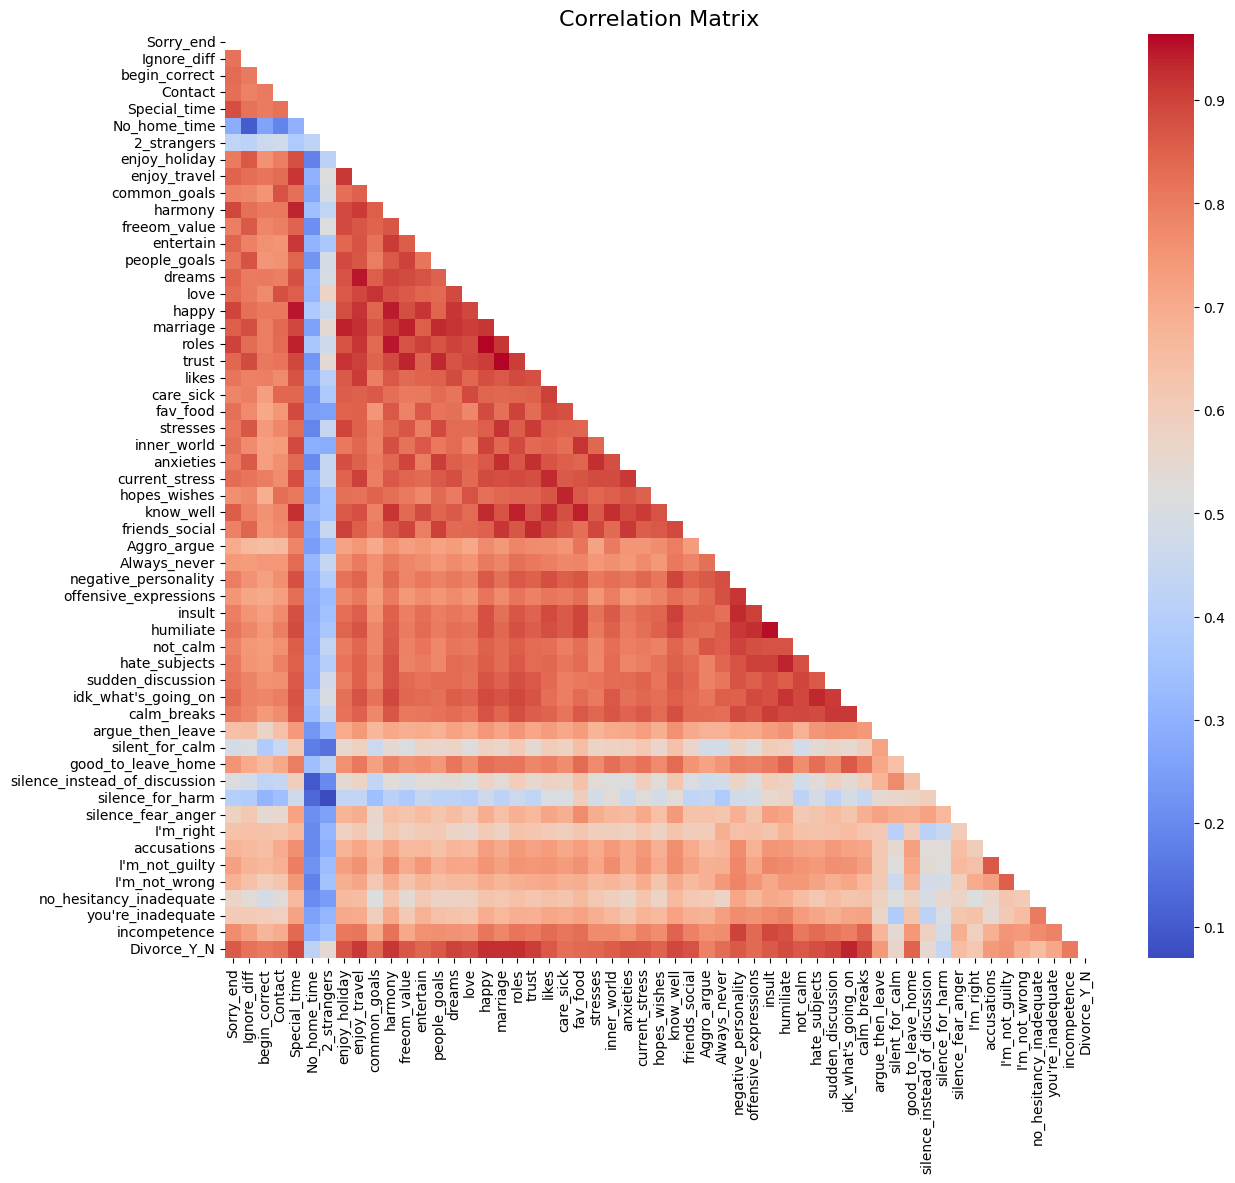

In [6]:
# Computing correlation matrix 
correlation_matrix = data.corr()

# Mask the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix', fontsize=16)
plt.show()


The results align with our initial assumptions: most variables show strong correlations, as indicated by the deep blue hues in the plot. Notably, two variables—"stranger time" and "no home time"—exhibit weaker correlations, represented by lighter blue shades. Upon quantifying the correlations, we identified 41 variables with averagecorrelations exceeding 0.7 and 11 variables below this threshold. The weakest average correlation, at 0.26, corresponds to "no home time". These findings confirm our expectations, demonstrating that the dataset is predominantly characterized by strong inter-variable correlations. These insights underscore the necessity for dimensionality reduction to mitigate multicollinearity and enhance model interpretability.


In [58]:

# Compute the mean correlation for each variable, excluding self-correlations (diagonal values)
mean_correlations = correlation_matrix.apply(lambda x: (x.sum() - x[x.name]) / (len(x) - 1))

# Display variables with mean correlations less than 0.7
low_corr_var = mean_correlations[mean_correlations < 0.7]

# Display variables with mean correlations greater than 0.7
high_corr_var = mean_correlations[mean_correlations > 0.7]

print(f"Number of low correlated variables: {low_corr_var.count()}")
print(f"Number of highly correlated variables: {high_corr_var.count()}")
print(f"Weakest corraleted variable: {mean_correlations.idxmin()} with value: {mean_correlations.min()}")

# Find the two weakest correlations in the correlation matrix
weakest_two = mean_correlations.sort_values(key=abs).drop_duplicates().iloc[:2]

# Display the weakest two correlations
print("Weakest Two Correlations:")
print(weakest_two)

Number of low correlated variables: 14
Number of highly correlated variables: 41
Weakest corraleted variable: No_home_time with value: 0.2629620065293393
Weakest Two Correlations:
No_home_time    0.262962
2_strangers     0.395847
dtype: float64


# Methodology
## Research Questions
1. Primary Question: Can Support Vector Machines effectively predict marital status (married vs. divorced) based on relationship-related survey responses?
2. Secondary Questions:
- Which features are the most significant predictors of divorce?
- How does dimensionality reduction via PCA affect model performance and interpretability?
- What is the robustness of the SVM model across different training samples?

## Empirical Approach
Quantitative research methods will be employed to analyze the empirical results derived from the Divorce Predictor Scale, developed through Gottman Couples Therapy (Gottman, 2014). Previous work in this field has examined various machine learning techniques for divorce prediction, including neural networks and random forest algorithms (Yontem et al., 2019; Lingjun et al., 2018), while Kong and Chai (2020) incorporated Support Vector Machines (SVM) into their methodology. Building on these foundations, this project seeks to advance the current understanding by refining SVM hyperparameters to enhance the model’s predictive capabilities, introducing Principal Component Analysis (PCA) to achieve an optimal balance between interpretability and accuracy in the high-dimensional dataset, and evaluating model robustness through bootstrap methods to ensure that the results are both reliable and generalizable. By integrating these enhancements, the study aims to improve the predictive accuracy of the Divorce Predictor Scale while preserving a transparent and interpretable model structure.

## Support vector machine
Support Vector Machine (SVM)
Support Vector Machines (SVM) are particularly effective for binary classification tasks. Although primarily designed for two-class problems, SVMs can be adapted for multi-class classification with appropriate adjustments. The primary objective of SVM is to identify the optimal separating hyperplane that maximizes the margin between the two classes.

Optimal Separating Hyperplane
The margin is defined as the perpendicular distance from the separating hyperplane to the nearest training observations from each class. The optimal hyperplane, also known as the maximal margin classifier or the "widest street approach," is the one that has the largest possible margin, thereby enhancing the model's generalization capability on unseen data.

Mathematically, the separating hyperplane can be expressed by the linear equation:

\[
f(x) = W \cdot X + b = 0
\]

where:

- \( W \) is the weight vector determining the orientation (slope) of the hyperplane in the feature space.
- \( b \) is the bias term.
  
The weight vector W is perpendicular to the hyperplane, pointing in the direction of the steepest increase in the decision function. Only a subset of the training data, known as support vectors, lie on or near the margin and are crucial in defining the position and orientation of the hyperplane. Consequently, the optimization process in SVM leads to a sparse solution with only a few non-zero weights, corresponding to the most influential features for class separation.

#### Kernel Functions
SVMs utilize kernel functions to handle non-linearly separable data by mapping the input features into a higher-dimensional space where a linear separator is feasible. In this project, we will employ two types of kernel functions. Firsly, the Linear Kernel which is suitable for linearly separable data, it does not transform the input space. Secondly, the Radial Basis Function (RBF) Kernel, A non-linear kernel that maps data into an infinite-dimensional space, enabling the separation of classes that are not linearly separable in the original feature space.

SVMs require the tuning of several hyperparameters to optimize performance:

C (Regularization Parameter): Controls the trade-off between achieving a low training error and a low testing error (generalization). A higher C value implies a harder margin, penalizing misclassifications more heavily, while a lower C allows for a softer margin, making the model more robust to noise and outliers at the potential cost of slight decreases in accuracy.

Gamma (Kernel Coefficient): Determines the influence of a single training example. In the case of the RBF kernel, a higher gamma value makes the decision boundary more flexible, while a lower gamma results in a smoother boundary.

In this project, we will explore multiple values for these hyperparameters and evaluate their performance using cross-validation to identify the optimal combination that balances model complexity and predictive accuracy.

## Accuracy versus Interpetability
A critical aspect of our research is achieving an optimal balance between model accuracy and interpretability. Our objective is twofold: to identify the variables that significantly contribute to marital happiness and to maintain sufficient predictive power to accurately classify marital status. However, the dataset presents high correlations among the explanatory variables, which can lead to multicollinearity and complicate model interpretation.

To address this, we have implemented Principal Component Analysis (PCA), a dimensionality reduction technique that transforms the original correlated variables into a smaller set of uncorrelated principal components. The first principal component captures the maximum variance present in the data, while each subsequent component captures the remaining variance in a direction orthogonal to the previous components.

### Benefits of PCA
The high inter-variable correlations identified in our exploratory analyses make Principal Component Analysis (PCA) an ideal technique for our dataset. Correlation, being a metric based on linearity, indicates that multiple variables may be capturing similar underlying constructs. By implementing PCA, we aim to achieve several key objectives.

Firstly, PCA effectively reduces dimensionality by decreasing the number of features in the model. This simplification enhances interpretability, allowing us to focus on the most significant components without sacrificing substantial information. Reducing the number of features also plays a crucial role in addressing overfitting. With fewer variables, the model becomes less complex and less likely to capture noise or irrelevant patterns in the data, thereby improving its generalization to unseen data.

Secondly, PCA enhances interpretability by concentrating on principal components that represent the primary factors influencing marital status. These components provide a clearer understanding of the underlying dynamics at play, making it easier to identify and interpret the most influential predictors within the dataset.

Thirdly, PCA maintains predictive power by ensuring that the transformed data retains the majority of the original variance. This preservation of variance allows the model to remain effective in making accurate predictions, as the essential information required for classification is still captured within the principal components.

Lastly, PCA facilitates the translation of data from the principal component space back to the original feature space through inverse transformation. This capability enables us to interpret the impact of the original variables on the principal components, thereby elucidating how specific features contribute to the final classification results. By understanding these contributions, we can gain valuable insights into the factors that most significantly influence marital outcomes.

In summary, PCA serves as a powerful tool in our analysis by simplifying the model, enhancing interpretability, maintaining predictive accuracy, and mitigating overfitting. These benefits collectively support our objective of developing a robust and comprehensible Divorce Predictor Scale.


## Robustness of Results
To ensure the reliability and generalizability of our Support Vector Machine (SVM) model, we will employ the non-parametric bootstrap method. This robust statistical technique involves resampling the original training dataset with replacement to create multiple "bootstrap samples." Each bootstrap sample acts as an independent training set, enabling us to train the model repeatedly under varying data distributions.

The bootstrap procedure begins with resampling the original training data to generate a substantial number of bootstrap samples, each containing the same number of observations as the original dataset but with potential duplicates due to the nature of sampling with replacement. For each of these bootstrap samples, we will train the SVM model using the hyperparameters optimized through cross-validation. Once trained, the model's performance will be evaluated on a fixed test dataset, and performance metrics such as accuracy will be recorded for each iteration.

After completing the resampling and training processes across all bootstrap samples, we will aggregate the performance metrics to assess the model's variability and stability. This aggregation will allow us to compute confidence intervals, providing a probabilistic measure of the model's performance on unseen data. By analyzing these confidence intervals, we can gain insights into the consistency and reliability of the model's predictions.

The primary objectives of employing the bootstrap method in our analysis are twofold. Firstly, we aim to assess the variability of the model's performance by understanding how sensitive it is to different training samples. This is crucial for evaluating the model's ability to generalize beyond the specific dataset it was trained on. Secondly, the bootstrap approach enables us to estimate confidence intervals around our performance metrics, offering statistical bounds that reflect the reliability and consistency of the model.

Through this rigorous bootstrap assessment, we ensure that our SVM model not only performs well on the training and test datasets but also maintains consistent performance across diverse data samples. This comprehensive evaluation affirms the robustness of our model, providing confidence in its applicability and effectiveness in predicting marital status based on the given dataset.




# Implementation
## Parameter Tuning

In [5]:
# First we want to know which parameters are appropriate for our data
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Grid search
grid = GridSearchCV(SVC(), param_grid, cv=5, verbose=2)
grid.fit(X, y)

# Best parameters
print("Best Parameters:", grid.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.0

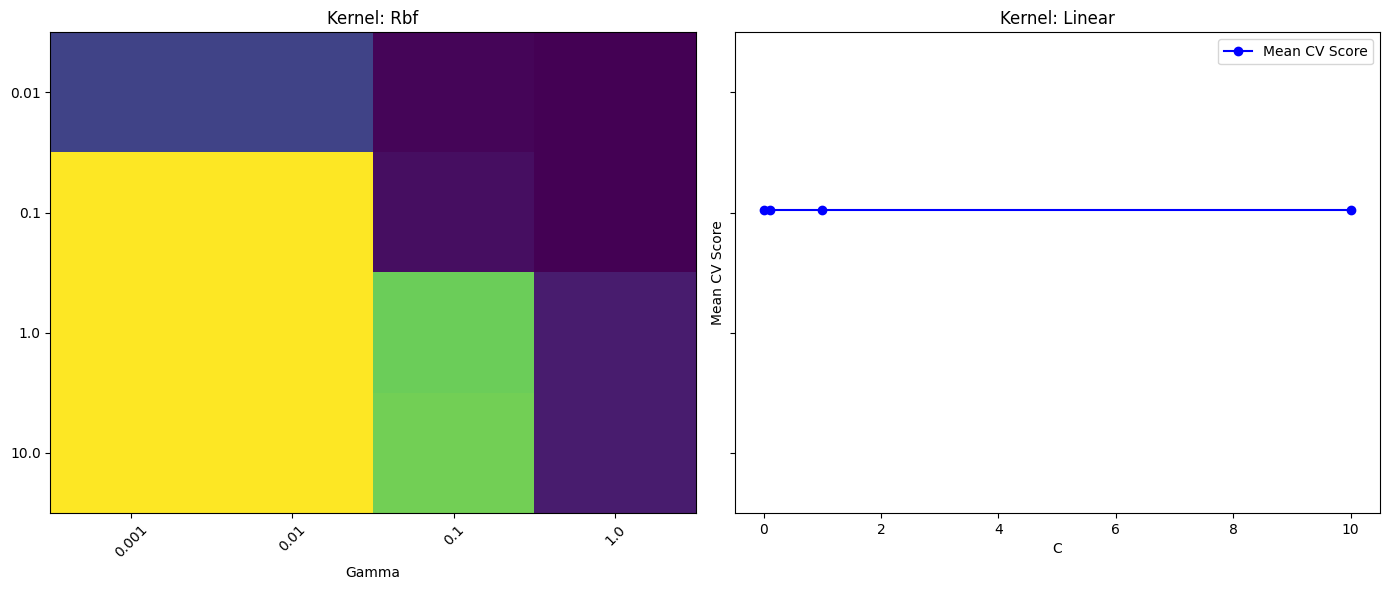

Best Parameters: {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best CV Score: 0.9764705882352942


In [8]:
#: Extract the results into a DataFrame
results = pd.DataFrame(grid.cv_results_)

#: Pivot the results to create a heatmap-friendly format
pivot_table = results.pivot_table(values='mean_test_score', 
                                  index='param_C', 
                                  columns=['param_gamma', 'param_kernel'])

#(Updated): Visualize the results with heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
kernels = ['rbf', 'linear']

for i, kernel in enumerate(kernels):
    if kernel == 'rbf':
        # For RBF kernel, show C vs Gamma
        kernel_data = pivot_table.xs(kernel, level='param_kernel', axis=1)
        im = axes[i].imshow(kernel_data, cmap='viridis', interpolation='nearest', aspect='auto')
        axes[i].set_title(f'Kernel: {kernel.capitalize()}')
        axes[i].set_xlabel('Gamma')
        axes[i].set_xticks(range(len(kernel_data.columns)))
        axes[i].set_xticklabels(kernel_data.columns, rotation=45)
    elif kernel == 'linear':
        # For Linear kernel, show only C
        kernel_data = pivot_table.xs(kernel, level='param_kernel', axis=1).mean(axis=1)
        axes[i].plot(kernel_data.index, kernel_data.values, marker='o', color='blue', label='Mean CV Score')
        axes[i].set_title(f'Kernel: {kernel.capitalize()}')
        axes[i].set_xlabel('C')
        axes[i].set_ylabel('Mean CV Score')
        axes[i].legend()

    axes[i].set_yticks(range(len(kernel_data.index)))
    axes[i].set_yticklabels(kernel_data.index)
plt.tight_layout()
plt.show()

# Display the best parameters and corresponding score
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

## Optimal parameters
Through extensive cross-validation aimed at identifying the optimal hyperparameters, we determined that the best-performing model utilizes a regularization parameter C of 0.01, a gamma value of 0.001, and a linear kernel. Notably, the selection of a linear kernel renders the gamma parameter redundant, as gamma primarily influences the behavior of non-linear kernels such as the Radial Basis Function (RBF) kernel.

### Interpretation of Hyperparameter Tuning Results
The cross-validation process revealed that the mean cross-validation score remained relatively constant across different values of the regularization parameter C and gamma, specifically within the context of the linear kernel. This stability in accuracy suggests that variations in these hyperparameters do not significantly impact the model's performance for our dataset. One possible explanation for this phenomenon is that the model may be overfitting; however, this seems unlikely given that changes in C do not lead to substantial improvements in performance. Overfitting typically manifests when a model excessively adapts to the training data, capturing noise rather than the underlying pattern. The lack of significant performance variation across different C values indicates that the model is not overly sensitive to the regularization parameter.

Another plausible explanation is that the underlying relationships within our data are inherently linear. The preference for a linear kernel over an RBF kernel supports this hypothesis, as a linear kernel is most effective when data is linearly separable. This aligns with our descriptive analyses, where high correlation coefficients among variables suggest strong linear relationships. High correlations imply that many variables are measuring similar constructs, reinforcing the suitability of a linear model for this dataset.

Additionally, the categorical and ordinal nature of our input variables, ranging from 0 to 4, inherently supports linear relationships. This linearity further justifies the effectiveness of a linear kernel in capturing the essential patterns necessary for accurate classification.

Lastly, the limited variation in the output variable may contribute to the observed stability in model performance across different hyperparameter settings. In smaller datasets, where there is insufficient variability or distinct patterns in the target variable, models may exhibit consistent performance regardless of changes in hyperparameters like C. This characteristic is common in datasets with a small number of observations, as is the case with our study.

### Addressing Overfitting with Principal Component Analysis (PCA)
To further investigate the causes behind the stable cross-validation scores and to enhance our model's robustness, we will incorporate Principal Component Analysis (PCA) into our methodology. PCA serves as an effective tool for mitigating overfitting by reducing the dimensionality of the dataset. By transforming the original high-dimensional data into a lower-dimensional space, PCA helps in capturing the most significant variance while eliminating redundant features. This dimensionality reduction not only simplifies the model, making it more interpretable, but also preserves the essential information required for accurate predictions. Furthermore, implementing PCA allows us to achieve a balance between interpretability and predictive power. With fewer principal components, the model becomes less complex and less prone to overfitting, while still retaining the critical information necessary for classification. Additionally, PCA facilitates the translation of data from the principal component space back to the original feature space, enabling us to interpret the contributions of individual variables to the final model.

### Next Steps
We will first finalize the SVM model without incorporating PCA to establish a baseline performance using the optimal parameters of C=0.01 and a linear kernel. Subsequently, we will introduce PCA to further refine the model, assess its impact on performance, and ensure that the model maintains its predictive accuracy while becoming more interpretable and robust against potential overfitting.

In [ ]:
## SVM Without PCA

In [61]:

# SVM model including tuned parameters without PCA 
svm_linear = SVC(kernel='linear', C=0.01)
# Fit linear model
svm_linear.fit(X_train, y_train)
# predict on unseen data
y_predict_linear = svm_linear.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_predict_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_linear))
print("Classification Report:\n", classification_report(y_test, y_predict_linear))

Accuracy: 0.9607843137254902
Confusion Matrix:
 [[26  0]
 [ 2 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.92      0.96        25

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



### Interpretation SVM Without PCA
The SVM model with linear kernel and C=0.01 achieves a test accuracy of about 96%, indicating strong overall performance. The confusion matrix shows that the model perfectly identifies all instances of divorce and misclassifies only two instances of happy mariage. Precision, recall, and F1-scores are consistently high for both classes, suggesting a well-balanced and reliable classifier that effectively captures the underlying patterns in your data.

## SVM and PCA

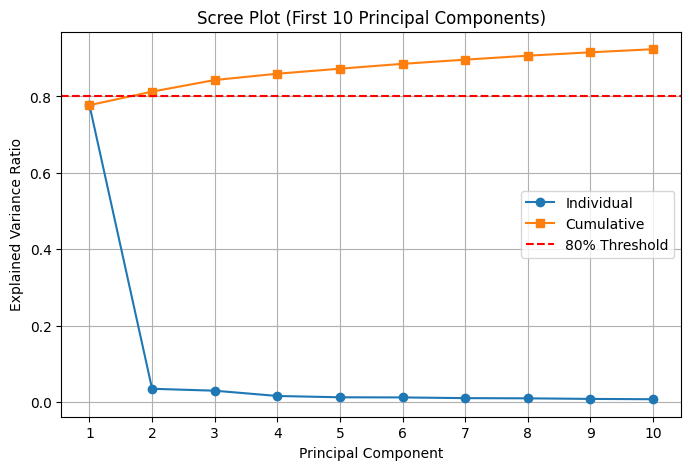

Explained Variance Ratios (First 10): [0.77720651 0.03536271 0.03033919 0.01654478 0.0130954  0.01274141
 0.01091836 0.01038074 0.00885811 0.00804994]
Cumulative Variance Ratios (First 10): [0.77720651 0.81256922 0.84290841 0.85945319 0.87254859 0.88529
 0.89620836 0.90658911 0.91544722 0.92349716]


In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA
pca = PCA()
pca.fit(X_train)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Scree plot (First 10 components only)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), explained_variance_ratio[:10], marker='o', label='Individual')
plt.plot(range(1, 11), cumulative_variance[:10], marker='s', label='Cumulative')
plt.title('Scree Plot (First 10 Principal Components)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 11))  # Show x-ticks for only the first 10 components
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.legend()
plt.grid()
plt.show()

# Print PCA results (First 10 components)
print("Explained Variance Ratios (First 10):", explained_variance_ratio[:10])
print("Cumulative Variance Ratios (First 10):", cumulative_variance[:10])

### Number of Principal Components
The PCA results indicate that the dataset’s variance is effectively captured, with the first principal component accounting for approximately 77% of the total variability and the second principal component contributing an additional 3.67%. As expected, the first principal component explains the majority of the variance. Regardless of whether we apply the elbow rule or consider cumulative variance, the analysis consistently leads us to select two principal components.

With these two components chosen, we will proceed by tuning the model’s hyperparameters—such as the regularization parameter C, the kernel function, and (if applicable) the gamma parameter—to refine the classifier’s performance in this reduced-dimensionality space.

### Paramater Tuning PCA

In [11]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Grid search
grid = GridSearchCV(SVC(), param_grid, cv=5, verbose=2)
grid.fit(X_pca, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.0

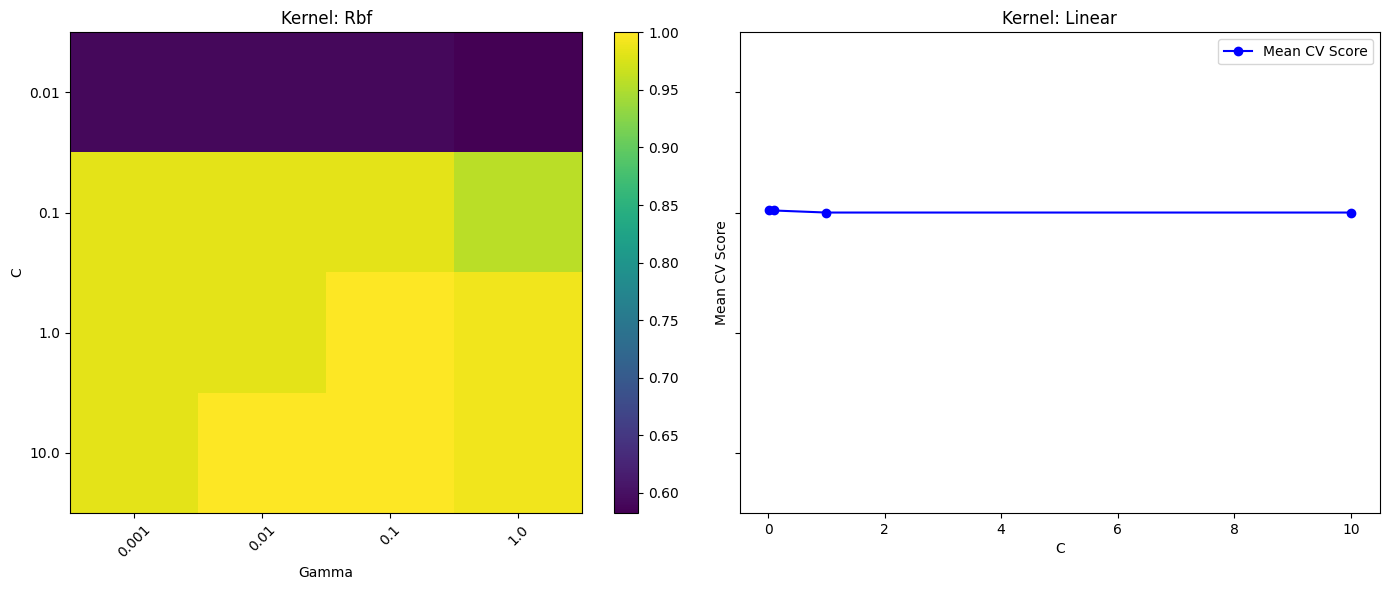

Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best CV Score: 1.0


In [14]:
# Extract the results into a DataFrame
results = pd.DataFrame(grid.cv_results_)

# Step 5: Pivot the results to create a heatmap-friendly format
pivot_table = results.pivot_table(values='mean_test_score', 
                                  index='param_C', 
                                  columns=['param_gamma', 'param_kernel'], 
                                  aggfunc="mean")

# Visualize the results with heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
kernels = ['rbf', 'linear']

for i, kernel in enumerate(kernels):
    if kernel == 'rbf':
        # For RBF kernel: C vs Gamma heatmap
        kernel_data = pivot_table.xs(kernel, level='param_kernel', axis=1)
        im = axes[i].imshow(kernel_data, cmap='viridis', interpolation='nearest', aspect='auto')
        axes[i].set_title(f'Kernel: {kernel.capitalize()}')
        axes[i].set_xlabel('Gamma')
        axes[i].set_xticks(range(len(kernel_data.columns)))
        axes[i].set_xticklabels(kernel_data.columns, rotation=45)
        axes[i].set_ylabel('C')
        axes[i].set_yticks(range(len(kernel_data.index)))
        axes[i].set_yticklabels(kernel_data.index)
        # Add color bar
        fig.colorbar(im, ax=axes[i])
        
    elif kernel == 'linear':
        # For Linear kernel: Line plot (C vs Mean CV Score)
        kernel_data = pivot_table.xs(kernel, level='param_kernel', axis=1).mean(axis=1)
        axes[i].plot(kernel_data.index, kernel_data.values, marker='o', color='blue', label='Mean CV Score')
        axes[i].set_title(f'Kernel: {kernel.capitalize()}')
        axes[i].set_xlabel('C')
        axes[i].set_ylabel('Mean CV Score')
        axes[i].legend()

plt.tight_layout()
plt.show()

# Step 7: Display the best parameters and corresponding score
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

#### Interpretation Parameter Tuning including PCA
The results show that after applying PCA, the optimal hyperparameters shifted, with the model now preferring C=1 instead of the lower C value previously identified. This change suggests that reducing the dimensionality of the data can alter the balance between model complexity and generalization. When the data is transformed into a lower-dimensional space, redundant and noisy features are diminished, potentially making the patterns that separate classes clearer. In this simplified feature space, the model can tolerate a less stringent regularization parameter (a higher C) without overfitting. In other words, the penalty for misclassifying training points becomes less critical because the principal components capture the core variance that truly distinguishes the classes. As a result, the model can afford to fit the training data more closely—hence a higher C—and still perform exceptionally well on cross-validation, as reflected by the perfect CV score. 

In [17]:
# Apply PCA on the training data and transform both train and test sets
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)        # Fit PCA on training data
X_pca_test = pca.transform(X_test)        # Transform test data using the same PCA

# Fit the SVM model on the PCA-transformed training data
svm_pca = SVC(kernel='linear', C=1.0)
svm_pca.fit(X_pca, y_train)

# Predict on the PCA-transformed test data
y_predict_pca = svm_pca.predict(X_pca_test)

# Evaluate on the test set
print("Test Accuracy:", accuracy_score(y_test, y_predict_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_pca))
print("Classification Report:\n", classification_report(y_test, y_predict_pca))

# Calculate training accuracy using the PCA-transformed training data
y_pred_train = svm_pca.predict(X_pca)  
training_accuracy = accuracy_score(y_train, y_pred_train)

print("Training Accuracy:", training_accuracy)

Test Accuracy: 1.0
Confusion Matrix:
 [[26  0]
 [ 0 25]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        25

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

Training Accuracy: 1.0


#### Interpretation Results PCA With Optimal Parameters
The flawless test accuracy suggests that, after the chosen transformations, the data may be perfectly linearly separable, allowing the model to correctly classify every instance. While this might reflect a genuine pattern, it also raises concerns about overfitting. In other words, the model may have learned patterns that are too specific to this particular dataset and may not generalize well to other, more varied situations.

Implementing non-parametric bootstrapping can help verify these results. By repeatedly creating new “bootstrap” samples from the training data and evaluating the model’s performance, it becomes possible to assess how stable the accuracy score really is. If the perfect accuracy remains consistent across many different bootstrap samples, it suggests that the discovered pattern is robust. If the accuracy varies, however, the initial perfect result may have been more a matter of luck than a true indication of the model’s predictive strength. In this way, bootstrapping adds an extra layer of confirmation that helps determine whether the model’s performance is genuinely solid or just appears to be by chance.

## Non- parametric bootstrap
This method involves resampling the original training dataset with replacement to create multiple "bootstrap samples."
These samples are then used to train the model multiple times, and the test set is used to evaluate the model's performance for each bootstrap iteration. Finally, performance metrics (like accuracy) are aggregated over all iterations to estimate the model's variability and compute confidence intervals for those metrics.

In [18]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# Number of bootstrap samples
n_bootstraps = 100
accuracy_scores = []

# Perform bootstrap sampling
for i in range(n_bootstraps):
    X_train_boot, y_train_boot = resample(X_train, y_train, random_state=i)
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_train_boot_pca = pca.fit_transform(X_train_boot)
    X_test_pca = pca.transform(X_test)
    
    # Train the SVM model
    svm = SVC(kernel='linear', C=0.1, gamma=0.1)
    svm.fit(X_train_boot_pca, y_train_boot)
    
    # Evaluate on the test set
    y_pred_test = svm.predict(X_test_pca)
    accuracy_scores.append(accuracy_score(y_test, y_pred_test))

# Calculate mean and confidence interval
mean_accuracy = np.mean(accuracy_scores)
conf_interval = np.percentile(accuracy_scores, [2.5, 97.5])

print(f"Mean Test Accuracy: {mean_accuracy:.3f}")
print(f"95% Confidence Interval: {conf_interval}")

Mean Test Accuracy: 0.982
95% Confidence Interval: [0.96078431 1.        ]


#### Interpretation PCA, Optimal Parameters, Bootstrapping
The results show a mean test accuracy of approximately 98.2%, indicating that the model performs exceptionally well on the test set. With 95% confidence, the test accuracy lies between 96% and 100%, highlighting a narrow, stable interval and suggesting minimal variability across different training splits. These findings align with previous analyses, where concerns about overfitting initially arose due to the model’s perfect training accuracy. However, the bootstrap results now confirm that the model continues to perform reliably on unseen data, easing earlier worries and showing that its success is not simply the product of overfitting.

This consistency in performance supports further development and exploration of the model’s capabilities. Moreover, these results indicate that PCA may have successfully rendered the data nearly linearly separable. To assess whether this is truly the case, we will now visualize the principal components alongside the SVM decision boundary.

# Results
The plotted decision boundary below, in the PCA-transformed space, combined with the previously established near-perfect accuracy and tight confidence intervals, reinforces the conclusion that the model has effectively captured a strong underlying linear pattern in the data. Initially, the dataset consisted of 54 ordinal categorical features, many of which were highly correlated. Such high correlation often signals redundancy and the presence of latent, simpler structures hidden within the data.

By applying PCA to reduce the dimensionality, these underlying patterns were distilled into just a few principal components. The visualization now shows that the classes separate cleanly along these principal axes, allowing the linear SVM classifier to draw a nearly flawless boundary between them. The fact that both training and test sets align so well with this linear division—combined with the consistently high accuracy across different training splits confirmed by bootstrapping—suggests that the model’s outstanding performance is not a coincidence or overfitting artifact.

In other words, what began as a complex set of correlated, ordinal features appears to have been fundamentally linear in nature. The PCA step made this linear structure explicit, enabling a simple linear SVM to excel. The stability and reproducibility of these results underscore that the discovered pattern is robust, providing a strong rationale for moving forward with this approach and potentially exploring ways to interpret and utilize these principal components for practical insights.

The plot shows that the decision boundary for the divorced class is shaped by a single support vector, while for the married class, it relies on two support vectors. To understand which factors most strongly predict divorce, it is necessary to investigate how each original variable influences these support vectors. This involves first identifying the coordinates of the support vectors in the PCA-transformed space and then mapping these coordinates back to the original 54-dimensional feature set. By doing so, we can determine which variables exert the greatest impact on these critical data points, ultimately revealing the key predictors of marital dissolution. 

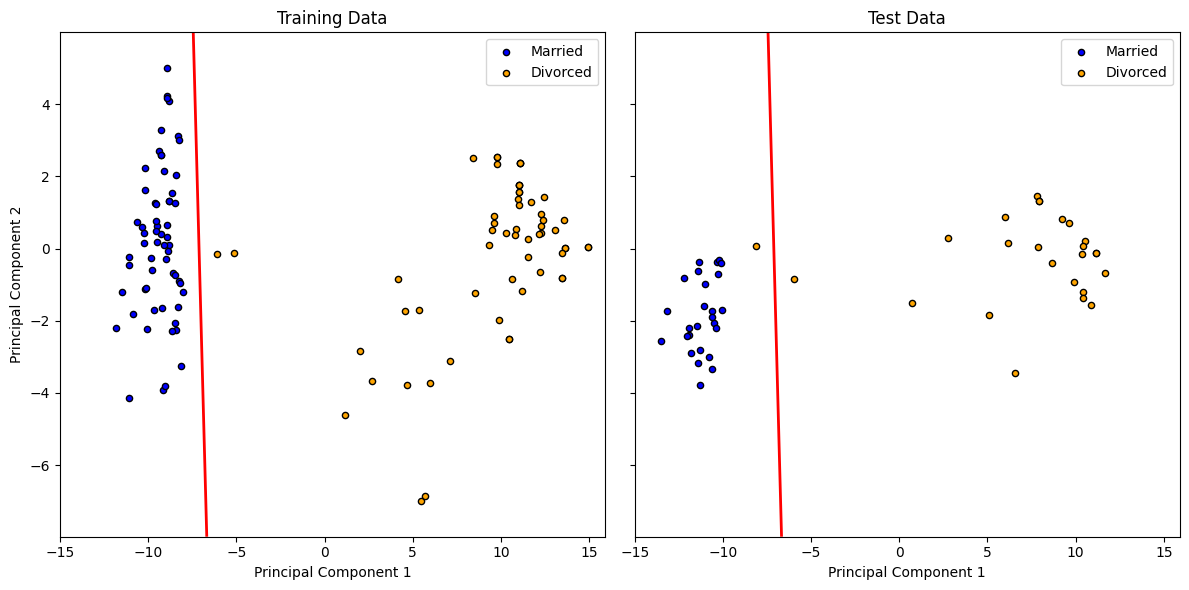

In [22]:
# Plot Decision Boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict decision boundary for each point in the grid
Z = svm_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Plot for Training Data
axes[0].scatter(
    X_pca[y_train == 0, 0], X_pca[y_train == 0, 1],
    c='blue', edgecolors='k', s=20, label='Married'
)
axes[0].scatter(
    X_pca[y_train == 1, 0], X_pca[y_train == 1, 1],
    c='orange', edgecolors='k', s=20, label='Divorced'
)
axes[0].contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
axes[0].set_title("Training Data")
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(loc='best')

# Plot for Test Data
axes[1].scatter(
    X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1],
    c='blue', edgecolors='k', s=20, label='Married'
)
axes[1].scatter(
    X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1],
    c='orange', edgecolors='k', s=20, label='Divorced'
)
axes[1].contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
axes[1].set_title("Test Data")
axes[1].set_xlabel('Principal Component 1')
axes[1].legend(loc='best')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [77]:
# Extract support vectors in the PCA-transformed space
support_vectors_pca = svm_pca.support_vectors_
support_indices = svm_pca.support_

#  Map support vectors back to the original feature space
# Inverse PCA transformation to return to the original space
support_vectors_original = pca.inverse_transform(support_vectors_pca)

# Compute weights in the original space
# For a linear kernel, weights in PCA space can be mapped back to the original space
weights_pca = svm_pca.coef_  # Weights in PCA space
weights_original = np.dot(weights_pca, pca.components_)  # Map weights to original space

# Create DataFrame to analyze support vectors in the original space
column_names = X.columns  # Use original column names if X is a DataFrame
support_analysis = pd.DataFrame(support_vectors_original, columns=column_names)

# Ensure y is a NumPy array for proper indexing
y_array = np.array(y)

# Add predicted class labels using the mapped class names
class_names = ['Married', 'Divorced']  # Adjust as per your actual class names
support_analysis['Predicted Class'] = [class_names[label] for label in y_array[support_indices]]

print("Support Vectors in Original Feature Space:")
print(support_analysis)

print("Weights for the Decision Boundary in Original Feature Space:")
print(pd.Series(weights_original.flatten(), index=column_names))

Support Vectors in Original Feature Space:
   Sorry_end  Ignore_diff  begin_correct   Contact  Special_time  \
0   0.951998     1.158982       1.209601  0.824418      0.650358   
1   0.817068     0.732961       1.065844  0.780186      0.529304   
2   1.191443     1.283423       1.384665  1.074372      0.918710   

   No_home_time  2_strangers  enjoy_holiday  enjoy_travel  common_goals  ...  \
0      0.494537     0.204409       0.691987      0.524650      0.758312  ...   
1      0.687143     0.507654       0.377669      0.426486      0.749137  ...   
2      0.601118     0.346267       0.888866      0.780639      1.022480  ...   

   silence_for_harm  silence_fear_anger  I'm_right  accusations  \
0          1.954814            1.479784   2.249911     1.696113   
1          1.098148            0.636961   2.546433     1.399109   
2          1.941098            1.547479   2.467556     1.866415   

   I'm_not_guilty  I'm_not_wrong  no_hesitancy_inadequate  you're_inadequate  \
0        1.701

In [78]:
# Compute the mean of the absolute weights for each feature
mean_weights = np.mean(np.abs(weights_original), axis=0)

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': column_names,
    'Mean Absolute Weight': mean_weights
}).sort_values(by='Mean Absolute Weight', ascending=False)

print("Feature Contributions to Support Vectors:")
print(feature_importance)

Feature Contributions to Support Vectors:
                          Feature  Mean Absolute Weight
34                         insult              0.191207
35                      humiliate              0.180981
40                    calm_breaks              0.172597
39            idk_what's_going_on              0.170035
32           negative_personality              0.169107
53                   incompetence              0.166448
37                  hate_subjects              0.163030
36                       not_calm              0.163009
38              sudden_discussion              0.154796
22                       fav_food              0.153389
10                        harmony              0.152586
28                      know_well              0.152573
4                    Special_time              0.151558
16                          happy              0.148786
18                          roles              0.148720
33          offensive_expressions              0.147598
19    

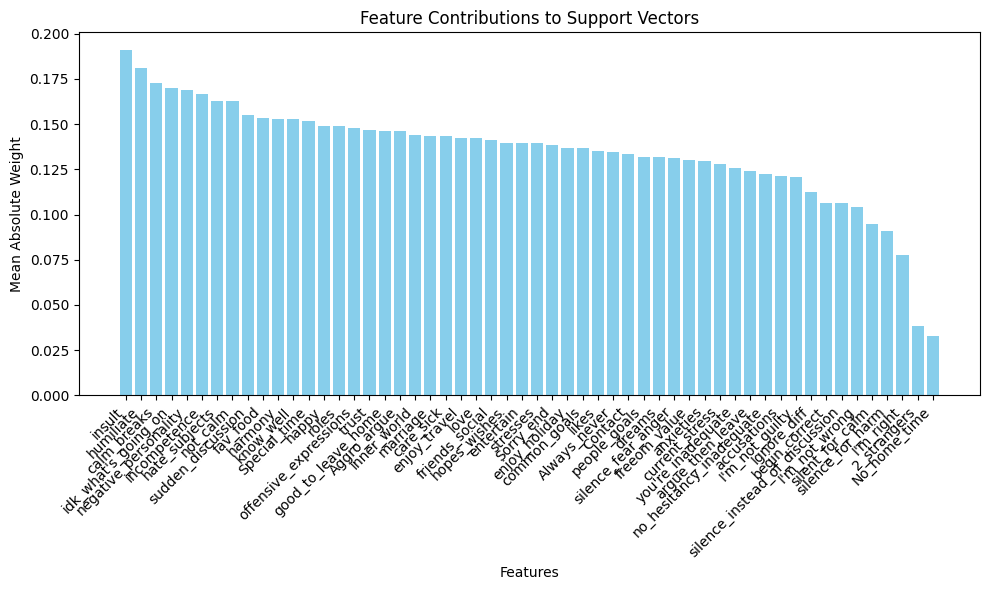

In [79]:
import matplotlib.pyplot as plt

# Bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Mean Absolute Weight'], color='skyblue')
plt.title("Feature Contributions to Support Vectors")
plt.xlabel("Features")
plt.ylabel("Mean Absolute Weight")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The findings indicate that the model’s decision boundary—after applying PCA and training a linear SVM—is primarily driven by a set of features that strongly separate one class from the other. By projecting the support vectors back into the original feature space, it becomes evident which variables exert the greatest influence on the classification decision. Here, the top-weighted features are predominantly associated with conflict-laden or negatively charged behaviors, such as “insult,” “humiliate,” “calm_breaks,” and “idk_what’s_going_on,” as well as traits related to negative personality elements or incompetence.

In practical terms, this means that the model finds these particular variables extremely effective at drawing a clear boundary between the two classes it aims to distinguish. The high absolute weights suggest that even small changes in these variables can substantially shift where an observation falls relative to the decision boundary. In other words, when these conflict-related factors are present or pronounced, the model classifies a data point into one category; when they are absent or less pronounced, the data point falls into another category.

This pattern also implies that the data, after dimensionality reduction, contains a direction in which differences in negative interaction styles or emotional volatility sharply distinguish one class from the other. Because the linear SVM relies on a single hyperplane to separate the classes, the variables with the greatest weights define the “axis” along which the classes differ most strongly. The heavy emphasis on negatively oriented features suggests that the line between the two classes may be primarily about the presence or intensity of these problematic behaviors.

The results indicate that the decision-making process of the model is highly sensitive to features representing negative, conflict-oriented behaviors. The separation uncovered by the PCA and solidified by the linear SVM hinge on these factors, indicating that they serve as decisive signals for how the model classifies the observations.

# Discussion of results

The present analysis achieves a near-perfect linear separation in the PCA-transformed feature space, culminating in a mean test accuracy of approximately 98.2% when evaluated using a bootstrap procedure. This performance not only surpasses Kon and Chai’s (2020) reported accuracy of 97.15%, but also closely approaches the benchmarks established by Yontem et al. (2019), who recorded accuracies of 98.23% with an RBF neural network and 98.83% with an ANN. Crucially, the linear SVM used here provides a high degree of interpretability without sacrificing exceptional predictive performance.

A direct comparison with Kon and Chai (2020) is insightful. While they employed a radial basis function (RBF) kernel in their SVM approach, the reasoning behind this choice is not fully detailed. Given the high degree of correlation observed in the original feature set, a linear kernel would appear more appropriate, as such correlations typically indicate underlying linear relationships. In this study, both PCA-transformed and non-PCA models consistently favored a linear kernel, highlighting that the data’s structure indeed lends itself to a linear decision boundary.

Beyond model selection, examining the key features that shape the decision boundary offers valuable insights. Kon and Chai’s (2020) Random Forest-based method underscored positive relational qualities—shared values, trust, and harmonious views of marriage. Such positive indicators are naturally emphasized by tree-based models, which improve classification incrementally through successive splits. In contrast, the linear SVM approach adopted here, particularly after PCA, reveals that conflict-driven behaviors exert the strongest influence on classification. Features such as “insult,” “humiliate,” and “calm_breaks” emerge as decisive indicators, suggesting that the mere presence of these negative traits can sharply delineate stable from unstable marriages.

This pattern demonstrates that marital stability involves not only the buildup of positive, supportive qualities but also the avoidance of damaging, conflict-related behaviors. Rather than relying on gradual accumulations of positive signals, the linear SVM capitalizes on a clear, singular decision boundary where negative factors command immediate weight. By approaching the classification from a linear, PCA-informed perspective, these results add nuance to the understanding of marital dynamics, revealing how certain detrimental behaviors can rapidly tip the scales toward instability.

# Future Reserach 
Future research in divorce prediction using machine learning may explore a range of promising directions aimed at enhancing both predictive accuracy and practical value. Although current models demonstrate impressive performance, their temporal stability remains an open question. Longitudinal studies that track couples over extended periods would provide insights into how these predictions hold up as relationships evolve. Beyond improving temporal robustness, future work could expand the feature set to encompass dynamic data sources—such as social media activity, financial patterns, or political views—offering a more holistic perspective on marital dynamics.

Moreover, validating these models across different cultures and societies would test their generalizability and practical applicability in a variety of real-world contexts. Finally, leveraging these predictive tools as early intervention mechanisms in therapeutic settings has the potential to bridge the gap between predictive analytics and direct relationship support. By providing timely, data-driven guidance, these models could help couples address emerging conflicts proactively, ultimately contributing to more constructive conflict resolution and healthier long-term outcomes.

# Conclusion
This study applied advanced machine learning techniques—specifically, Support Vector Machines (SVM), Principal Component Analysis (PCA), and bootstrapping—to investigate the predictive capabilities of the Divorce Predictor Scale (DPS) in distinguishing between married and divorced individuals. Building upon prior literature, which consistently highlights the relevance of communication patterns, shared values, and conflict resolution strategies, this research sought to determine whether dimensionality reduction via PCA could enhance the performance and interpretability of an SVM model trained on highly correlated, ordinal relationship data.

The findings demonstrate that PCA successfully revealed a near-perfect linear separability within the dataset, enabling a linear SVM to achieve a mean test accuracy of approximately 98.2%—a rate that not only surpasses the SVM performance reported by Kon and Chai (2020) but also closely approaches the best-in-class benchmarks set by Yontem et al. (2019). Unlike previous studies that emphasized an RBF kernel or tree-based methods, the results here indicate that a linear kernel is more appropriate given the data’s high correlations and underlying linearity. Moreover, while earlier research often spotlighted positive relational attributes as key predictors, the current model, when operating in a PCA-transformed space, identified negative, conflict-oriented behaviors—such as insults and humiliation—as the most decisive indicators separating stable marriages from those prone to dissolution.

These insights underscore the value of aligning methodological choices with the inherent structure of the data. PCA facilitated a more interpretable linear decision boundary, suggesting that even a few strongly negative behaviors can sharply influence marital outcomes. By reducing complexity and focusing the model’s attention on core dimensions, this approach not only maintained competitive accuracy but also offered clearer insights into the factors that decisively distinguish one marital status from another.

From a broader perspective, these findings highlight the potential benefits of feature engineering and dimensionality reduction techniques when analyzing complex social and psychological data. While robust machine learning algorithms can achieve remarkable predictive power, the use of PCA in this study demonstrates that paring down high-dimensional, correlated features into a smaller set of informative components can reveal underlying linear patterns, clarify the decision-making process, and preserve or even improve predictive performance.

In conclusion, this research contributes to the literature on divorce prediction by showing that a PCA-enhanced linear SVM can effectively leverage the DPS to achieve near-perfect separability between married and divorced couples. The approach refines our understanding of which relational characteristics are most critical, balancing between the constructive influence of positive variables identified in previous work and the more immediate, deterministic impact of negative conflict behaviors. These findings pave the way for future investigations that further integrate interpretability, model robustness, and culturally diverse datasets, and point toward practical applications in early intervention and couples’ therapy.

# References

Alshawarbeh, E., Shafqat, A., Alraqad, T., Abdelkader, M., Saber, H. and Shafqat, R. (2023) 'Divorce Prediction Using Machine Learning Algorithms in Ha'il Region, KSA', Research Square. doi:10.21203/rs.3.rs-2812556/v1.

Amato, P.R. (2000) 'The consequences of divorce for adults and children', Journal of Marriage and Family, 62(4), pp. 1269-1287.

Be, D., Whisman, M.A. and Uebelacker, L.A. (2013) 'Prospective associations between marital adjustment and life satisfaction', Personal Relationships, 20(4), pp. 728-739.

EuroStat (2023) Divorce indicators. Available at: https://ec.europa.eu/eurostat/databrowser/view/demo_ndivind/default/table?lang=en.

Fareed, S., Muhammad, M., Raza, A., Zhao, N., Tariq, A., Younas, F., Ahmed, G., Ullah, S., Jillani, S.F., Abbas, I. and Aslam, M. (2022) 'Predicting Divorce Prospect Using Ensemble Learning: Support Vector Machine, Linear Model, and Neural Network', Computational Intelligence and Neuroscience, 2022.

Gottman, J.M. (2014) What Predicts Divorce?: The Relationship Between Marital Processes and Marital Outcomes. New York: Psychology Press.

Gottman, J.M. and Levenson, R.W. (2000) 'The timing of divorce: Predicting when a couple will divorce over a 14-year period', Journal of Marriage and Family, 62(3), pp. 737-745.

Irfan, M., Uriawan, W., Kurahman, O., Ramdhani, M. and Dahlia, I. (2018) 'Comparison of naive bayes and k-nearest neighbor methods to predict divorce issues', IOP Conference Series: Materials Science and Engineering, 434(1), p. 012047.

Kong, J. and Chai, T. (2020) 'Is Your Marriage Reliable?: Divorce Analysis with Machine Learning Algorithms', Proceedings of the 2020 6th International Conference on Computing and Artificial Intelligence.

Lingjun, H., Levine, R., Fan, Juanjuan, Beemer, J., & Stronach, J. (2018). Random Forest as a Predictive Analytics Alternative to Regression in Institutional Research. Practical Assessment, Research, and Evaluation, 23(23). https://doi.org/10.7275/1wpr-m024

Ortiz-Ospina, E. and Roser, M. (2020) 'Marriages and Divorces', Our World in Data, 1(1).

Sun, Y. (2008) Short- and long-term effects of parental divorce. Available at: https://ipr.osu.edu/short-and-long-term-effects-parental-divorce 
Vanassche, S., Swicegood, G. and Matthijs, K. (2013) 'Marriage and children as a key to happiness? Cross-national differences in the effects of marital status and children on well-being', Journal of Happiness Studies, 14(2), pp. 501-524.

Whisman, M.A., Gilmour, A.L. and Salinger, J.M. (2018) 'Marital satisfaction and mortality in the United States adult population', Health Psychology, 37(11), pp. 1041-1044.
Wilkinson & Finkbeiner (2024) Divorce Statistics and Facts. Available at: https://www.wf-lawyers.com/divorce-statistics-and-facts/ 

Yöntem, M. K., Adem, K., İlhan, T., & Kılıçarslan, S. (2019). DIVORCE PREDICTION USING CORRELATION BASED FEATURE SELECTION AND ARTIFICIAL NEURAL NETWORKS. Nevşehir Hacı Bektaş Veli Üniversitesi SBE Dergisi, 9(1), 259–273. https://dergipark.org.tr/tr/pub/nevsosbilen/issue/46568/549416

Yöntem, M.K. and İlhan, T. (2018). Boşanma Göstergeleri Ölçeğinin Geliştirilmesi.
[Development of the Divorce Predictors Scale]. Sosyal Polika Çalışmaları Dergisi.
41, 339-358.